# Tabular Playground Series - Aug 2022


### Table of Contents : 

  * [Data Manipulation](#sec1)
       * [Importing Dataset](#sec1.1)
       * [Dataset View](#sec1.2)
       * [Dataset Information](#sec1.3)
       * [Summary Statistics](#sec1.4)
       * [Checking for unique values in integer type attribute](#sec1.5)
       * [Checking for missing values in each column](#sec1.6)
       * [percentage of missing values in each column](#sec1.7)
       
  * [Data Visualization](#sec2)
       * [Missing Value Plot](#sec2.1)
       * [Density Plot of Continuous Variables](#sec2.2)
       * [Heatmap](#sec2.3)
       * [Analysing categorical features with Pie chart](#sec2.4)
       
  * [Modeling](#sec3)
       * [Simple Imputer for filling missing values](#sec3.2)
       * [Applying logistic regression for training the dataset](#sec3.3)
       * [Precting Values from the test dataset](#sec3.3)
       
   * [Importing Submission File](#sec4)

## Data Manipulation <a class="anchor" id="sec1"></a>

### Importing libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

### Importing dataset <a class="anchor" id="sec1.1"></a>

In [40]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

### Dataset View <a class="anchor" id="sec1.2"></a>

In [41]:
df.head(10)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,18.04,12.52,15.75,19.29,11.74,20.16,10.67,15.86,17.59,15.19,15.03,NaN,13.03,14.68,764.10,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,18.21,11.54,17.72,17.89,12.75,17.89,12.45,17.95,17.91,11.76,14.73,15.43,14.39,15.63,682.06,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,18.06,11.65,16.74,18.24,12.72,18.29,12.71,15.61,NaN,13.80,16.71,18.63,14.09,17.95,663.38,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,17.30,11.19,18.58,18.34,12.58,19.06,12.47,16.35,18.38,10.02,15.25,15.56,16.15,17.17,826.28,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,19.35,12.95,16.99,15.75,11.31,18.09,10.34,17.08,19.93,12.43,16.18,12.76,13.15,16.41,579.88,0
5,5,A,75.35,material_7,material_8,9,5,11,4,0,17.56,13.72,16.59,NaN,11.59,20.81,10.62,14.90,19.11,13.33,15.35,19.25,NaN,17.62,832.90,0
6,6,A,161.71,material_7,material_8,9,5,12,2,4,17.30,12.64,17.48,17.68,12.96,17.92,11.37,17.71,19.92,11.56,16.65,17.73,NaN,16.64,684.44,1
7,7,A,177.92,material_7,material_8,9,5,4,8,8,17.06,13.63,17.88,15.89,11.03,18.64,10.25,16.45,20.48,12.21,15.62,16.97,15.18,17.23,684.00,1
8,8,A,109.50,material_7,material_8,9,5,9,6,5,18.11,11.89,17.35,18.56,11.54,19.89,11.56,15.96,19.60,14.09,15.67,13.33,13.54,15.41,NaN,0
9,9,A,98.72,material_7,material_8,9,5,10,4,7,18.95,12.25,17.30,18.48,11.30,19.01,10.38,15.24,18.43,12.63,14.32,14.33,12.87,NaN,NaN,0


### Dataset Information <a class="anchor" id="sec1.3"></a>

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

### Summary Statistics <a class="anchor" id="sec1.4"></a>

In [43]:
df.describe()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,"26,570.00","26,320.00","26,570.00","26,570.00","26,570.00","26,570.00","26,570.00","26,189.00","26,032.00","25,894.00","25,774.00","25,633.00","25,522.00","25,343.00","25,270.00","25,102.00","24,969.00","24,796.00","24,696.00","24,561.00","24,460.00","24,286.00","26,570.00"
mean,"13,284.50",127.83,6.75,7.24,7.42,8.23,6.26,17.79,11.73,17.13,17.51,11.72,19.02,11.43,16.12,19.17,11.70,15.65,16.05,15.00,16.46,701.27,0.21
std,"7,670.24",39.03,1.47,1.46,4.12,4.20,3.31,1.00,1.00,1.00,1.00,1.00,1.01,1.00,1.41,1.52,1.49,1.16,1.49,1.55,1.71,123.30,0.41
min,0.00,33.16,5.00,5.00,0.00,0.00,0.00,13.97,8.01,12.07,12.71,7.97,15.22,7.54,9.32,12.46,5.17,10.89,9.14,9.10,9.70,196.79,0.00
25%,"6,642.25",99.99,6.00,6.00,4.00,5.00,4.00,17.12,11.05,16.44,16.84,11.04,18.34,10.76,15.21,18.17,10.70,14.89,15.06,13.96,15.27,618.96,0.00
50%,"13,284.50",122.39,6.00,8.00,7.00,8.00,6.00,17.79,11.73,17.13,17.52,11.71,19.02,11.43,16.13,19.21,11.72,15.63,16.04,14.97,16.44,701.02,0.00
75%,"19,926.75",149.15,8.00,8.00,10.00,11.00,8.00,18.47,12.41,17.80,18.18,12.39,19.71,12.10,17.02,20.21,12.71,16.37,17.08,16.02,17.63,784.09,0.00
max,"26,569.00",385.86,9.00,9.00,29.00,29.00,24.00,21.50,16.48,21.43,21.54,15.42,23.81,15.41,22.48,25.64,17.66,22.71,22.30,21.63,24.09,"1,312.79",1.00


### Checking for unique values in all attribute <a class="anchor" id="sec1.5"></a>

In [44]:
df.nunique().sort_values(ascending=True)

failure               2
attribute_0           2
attribute_1           3
attribute_2           4
attribute_3           4
product_code          5
measurement_2        25
measurement_0        29
measurement_1        30
measurement_5      4671
measurement_4      4692
measurement_6      4704
measurement_9      4708
measurement_8      4713
measurement_3      4721
measurement_7      4734
measurement_13     5271
measurement_10     6177
measurement_14     6389
measurement_12     6392
measurement_11     6526
measurement_15     6577
measurement_16     7035
loading           11950
measurement_17    23612
id                26570
dtype: int64

### Checking for missing values in each column <a class="anchor" id="sec1.6"></a>

In [45]:
df.isnull().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

### percentage of missing values in each column <a class="anchor" id="sec1.7"></a>

In [46]:
pd.options.display.float_format = '{:,.2f} %'.format
(df.isnull().sum()/len(df))*100

id               0.00 %
product_code     0.00 %
loading          0.94 %
attribute_0      0.00 %
attribute_1      0.00 %
attribute_2      0.00 %
attribute_3      0.00 %
measurement_0    0.00 %
measurement_1    0.00 %
measurement_2    0.00 %
measurement_3    1.43 %
measurement_4    2.02 %
measurement_5    2.54 %
measurement_6    3.00 %
measurement_7    3.53 %
measurement_8    3.94 %
measurement_9    4.62 %
measurement_10   4.89 %
measurement_11   5.53 %
measurement_12   6.03 %
measurement_13   6.68 %
measurement_14   7.05 %
measurement_15   7.56 %
measurement_16   7.94 %
measurement_17   8.60 %
failure          0.00 %
dtype: float64

In [47]:
pd.options.display.float_format = '{:,.2f}'.format

## Data Visualization <a class="anchor" id="sec2"></a>

### Missing Value Plot <a class="anchor" id="sec2.1"></a>

In [48]:
import missingno as msno

<AxesSubplot:>

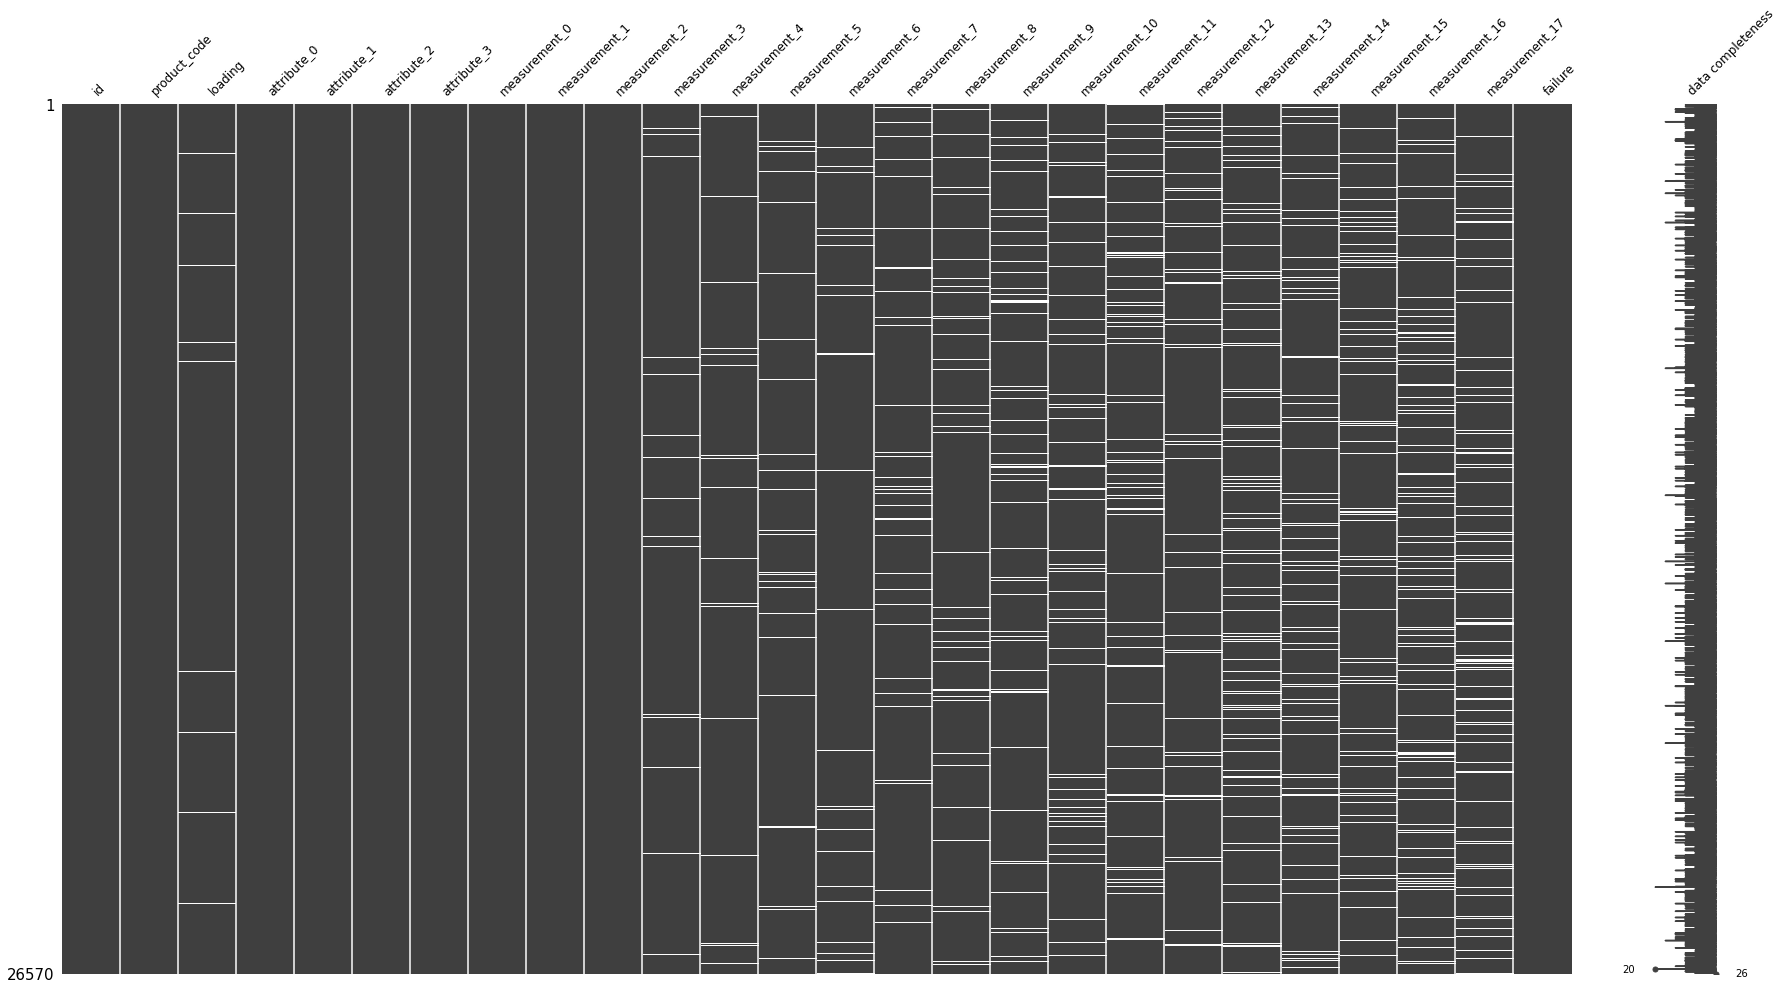

In [49]:
msno.matrix(df,labels=[df.columns],figsize=(30,16),fontsize=12)

### Checking the data distribution of each Continuous variable  <a class="anchor" id="sec2.2"></a>

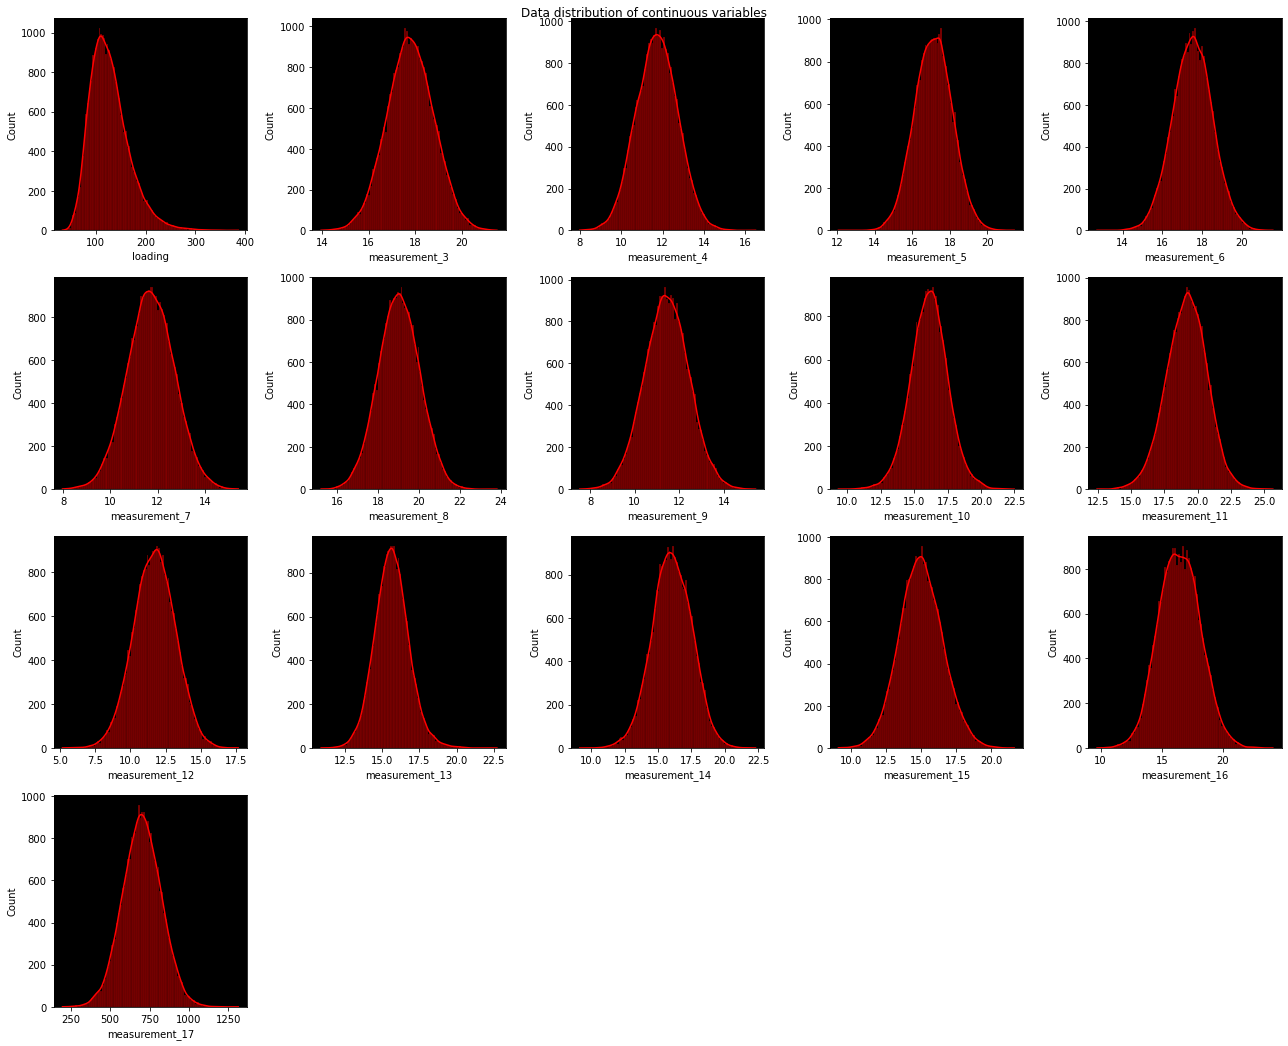

In [50]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,5, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

Here we can see that there are a lot of attributes which are positively or negatively distributed.so we will use power transformation to make these attributes symmetrical.

### Heatmap <a class="anchor" id="sec2.3"></a>

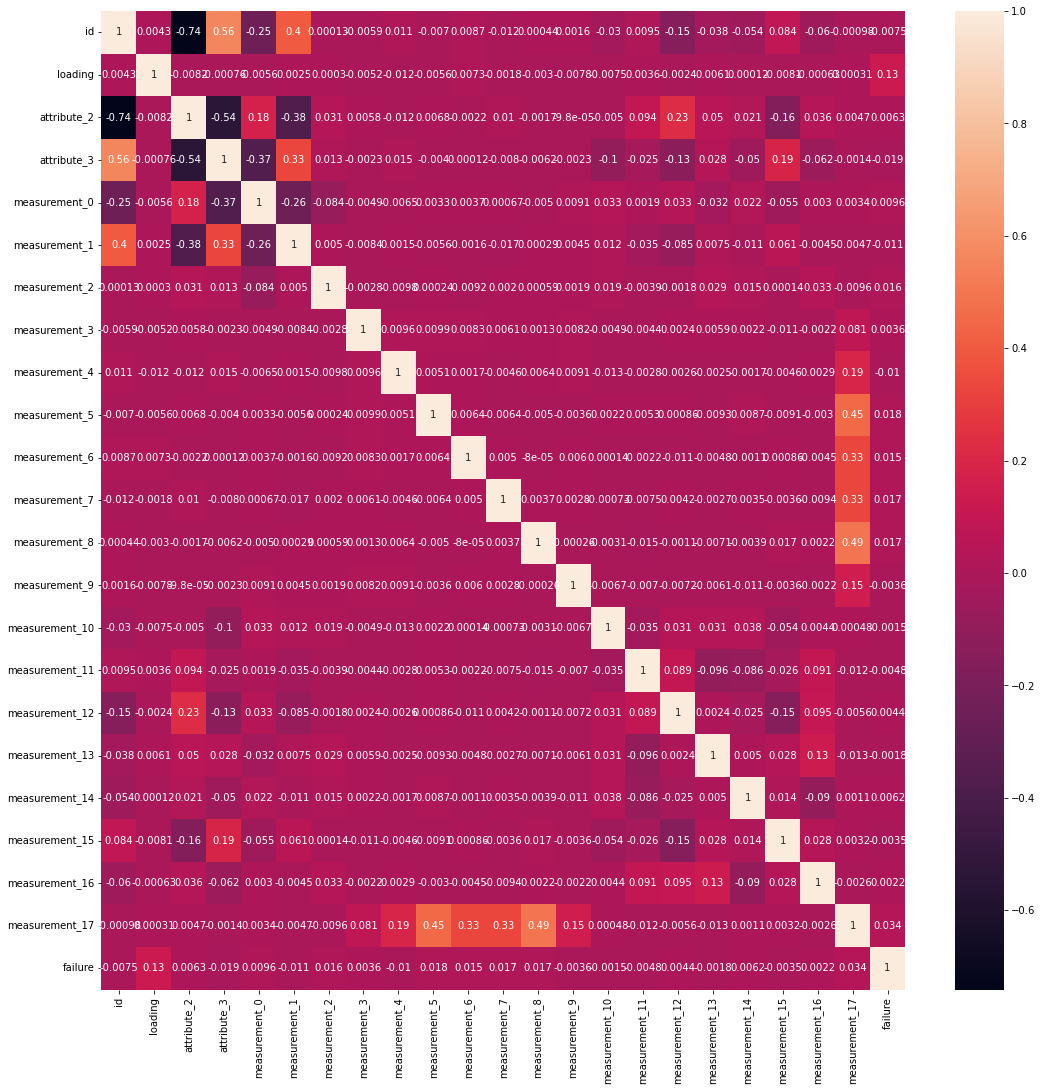

In [51]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Analysing Categorical features <a class="anchor" id="sec2.4"></a>

#### Failure

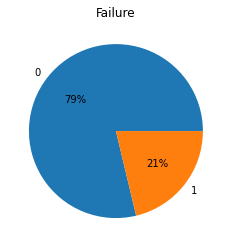

In [52]:
target_var=pd.crosstab(index=df['failure'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('Failure')
plt.show()

In [53]:
cat_var=['product_code','attribute_0', 'attribute_1','attribute_2', 'attribute_3']
train_val=[]
test_val=[]
for column in df[cat_var].columns:
    train_val.append(pd.crosstab(index=df[column], columns='per_obs', normalize='columns')*100)
for column in test[cat_var].columns:
    test_val.append(pd.crosstab(index=test[column], columns='per_obs', normalize='columns')*100)

#### pie Chart for all categorical variables in the training dataset

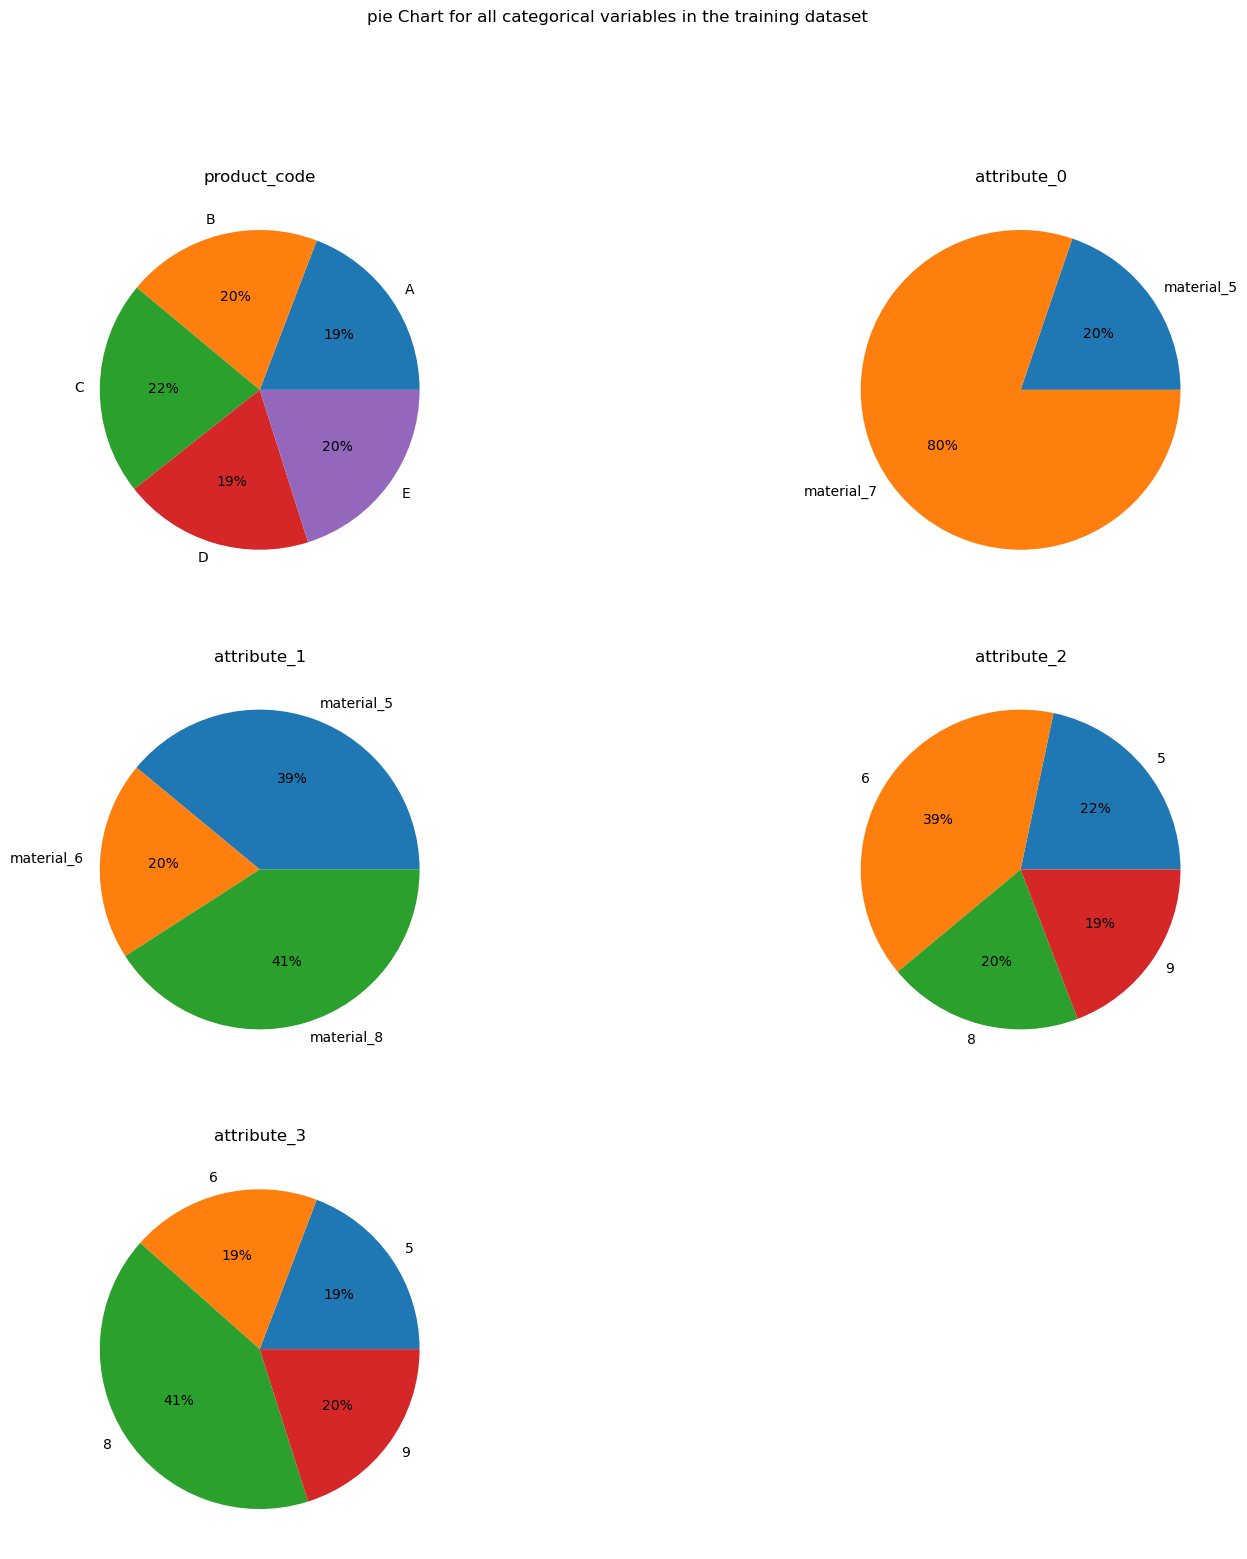

In [54]:
plt.figure(figsize=(18, 18),dpi=100)
for i in range(0,len(train_val)):
    ax = plt.subplot(3,2,i+1)
    ax.pie(train_val[i].per_obs,labels=train_val[i].index,autopct='%.0f%%')
    ax.set_title(train_val[i].index.name)
plt.suptitle('pie Chart for all categorical variables in the training dataset')
plt.show()

#### Pie Chart for all categorical variables in the testing dataset

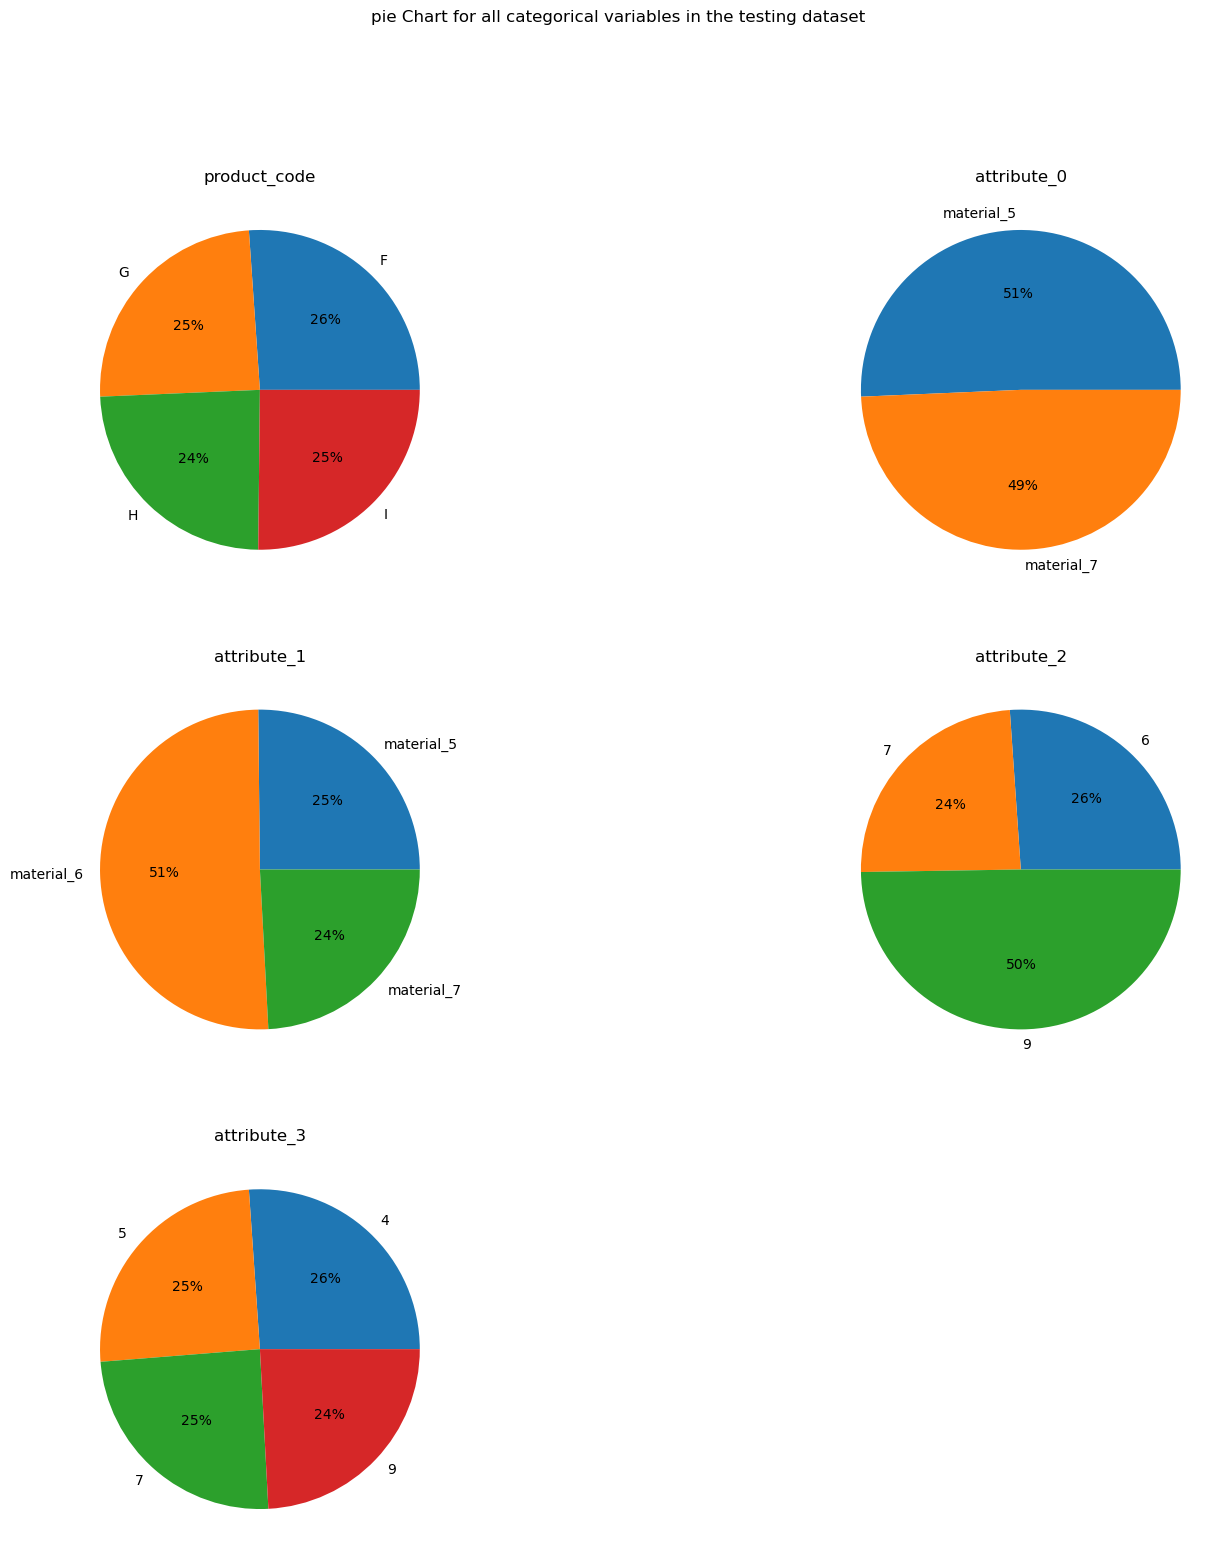

In [55]:
plt.figure(figsize=(18, 18),dpi=100)
for i in range(0,len(test_val)):
    ax = plt.subplot(3,2,i+1)
    ax.pie(test_val[i].per_obs,labels=test_val[i].index,autopct='%.0f%%')
    ax.set_title(test_val[i].index.name)
plt.suptitle('pie Chart for all categorical variables in the testing dataset')
plt.show()

#### Product_code

In [56]:
print(df['product_code'].unique())
print(test['product_code'].unique())

['A' 'B' 'C' 'D' 'E']
['F' 'G' 'H' 'I']


here we can see that in both the training and testing dataset have different unique values.so, we will delete this feature from both the datasets

In [57]:
del df['product_code']
del test['product_code']

#### Attribute_0

In [58]:
print(df['attribute_0'].unique())
print(test['attribute_0'].unique())

['material_7' 'material_5']
['material_5' 'material_7']


Both the dataset have same unique values in each column.we will encode this feature

In [59]:
df['attribute_0']=df['attribute_0'].map({'material_7':0,'material_5':1})
test['attribute_0']=test['attribute_0'].map({'material_7':0,'material_5':1})

#### Attribute_1

In [60]:
print(df['attribute_1'].unique())
print(test['attribute_1'].unique())

['material_8' 'material_5' 'material_6']
['material_6' 'material_7' 'material_5']


here we can see that in both the training and testing dataset have different unique values.so, we will delete this feature from both the datasets.

In [61]:
del df['attribute_1']
del test['attribute_1']

#### Attribute_2

In [62]:
print(df['attribute_2'].unique())
print(test['attribute_2'].unique())

[9 8 5 6]
[6 9 7]


here we can see that in both the training and testing dataset have different unique values.so, we will delete this feature from both the datasets.

In [63]:
del df['attribute_2']
del test['attribute_2']

#### Attribute_3

In [64]:
print(df['attribute_3'].unique())
print(test['attribute_3'].unique())

[5 8 6 9]
[4 7 9 5]


here we can see that in both the training and testing dataset have different unique values.so, we will delete this feature from both the datasets.

In [65]:
del df['attribute_3']
del test['attribute_3']

### Train and Test split

In [70]:
X_train=df.iloc[:,1:-1]
X_test=test.iloc[:,1:]
y_train=df.iloc[:,-1]

## Modeling <a class="anchor" id="sec3"></a>

### Simple Imputer for filling missing values<a class="anchor" id="sec3.1"></a>

Most of the features are symmetrically distributed so we will replace missing values with mean value

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train= imputer.fit_transform(X_train)
X_test=imputer.transform(X_test)

In [71]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [72]:
imp=IterativeImputer(estimator=LinearRegression(),missing_values=np.nan)

In [73]:
X_train=imp.fit_transform(X_train)
X_test=imp.transform(X_test)

### Applying Logistic Regresson for training dataset <a class="anchor" id="sec3.2"></a>

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
classifier=LogisticRegression(max_iter=50, multi_class='auto', penalty='none', solver='newton-cg')
classifier.fit(X_train,y_train)

C:\Users\dhirakumar\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(max_iter=50, penalty='none', solver='newton-cg')

### Precting Values from the test dataset <a class="anchor" id="sec3.3"></a>

In [76]:
y_pred=classifier.predict_proba(X_test)

### Importing Submission file <a class="anchor" id="sec4"></a>

In [77]:
sub=pd.read_csv('sample_submission.csv')

In [78]:
sub['failure']=y_pred[:,1]

In [79]:
sub.to_csv('final_submission2.csv',index=False)